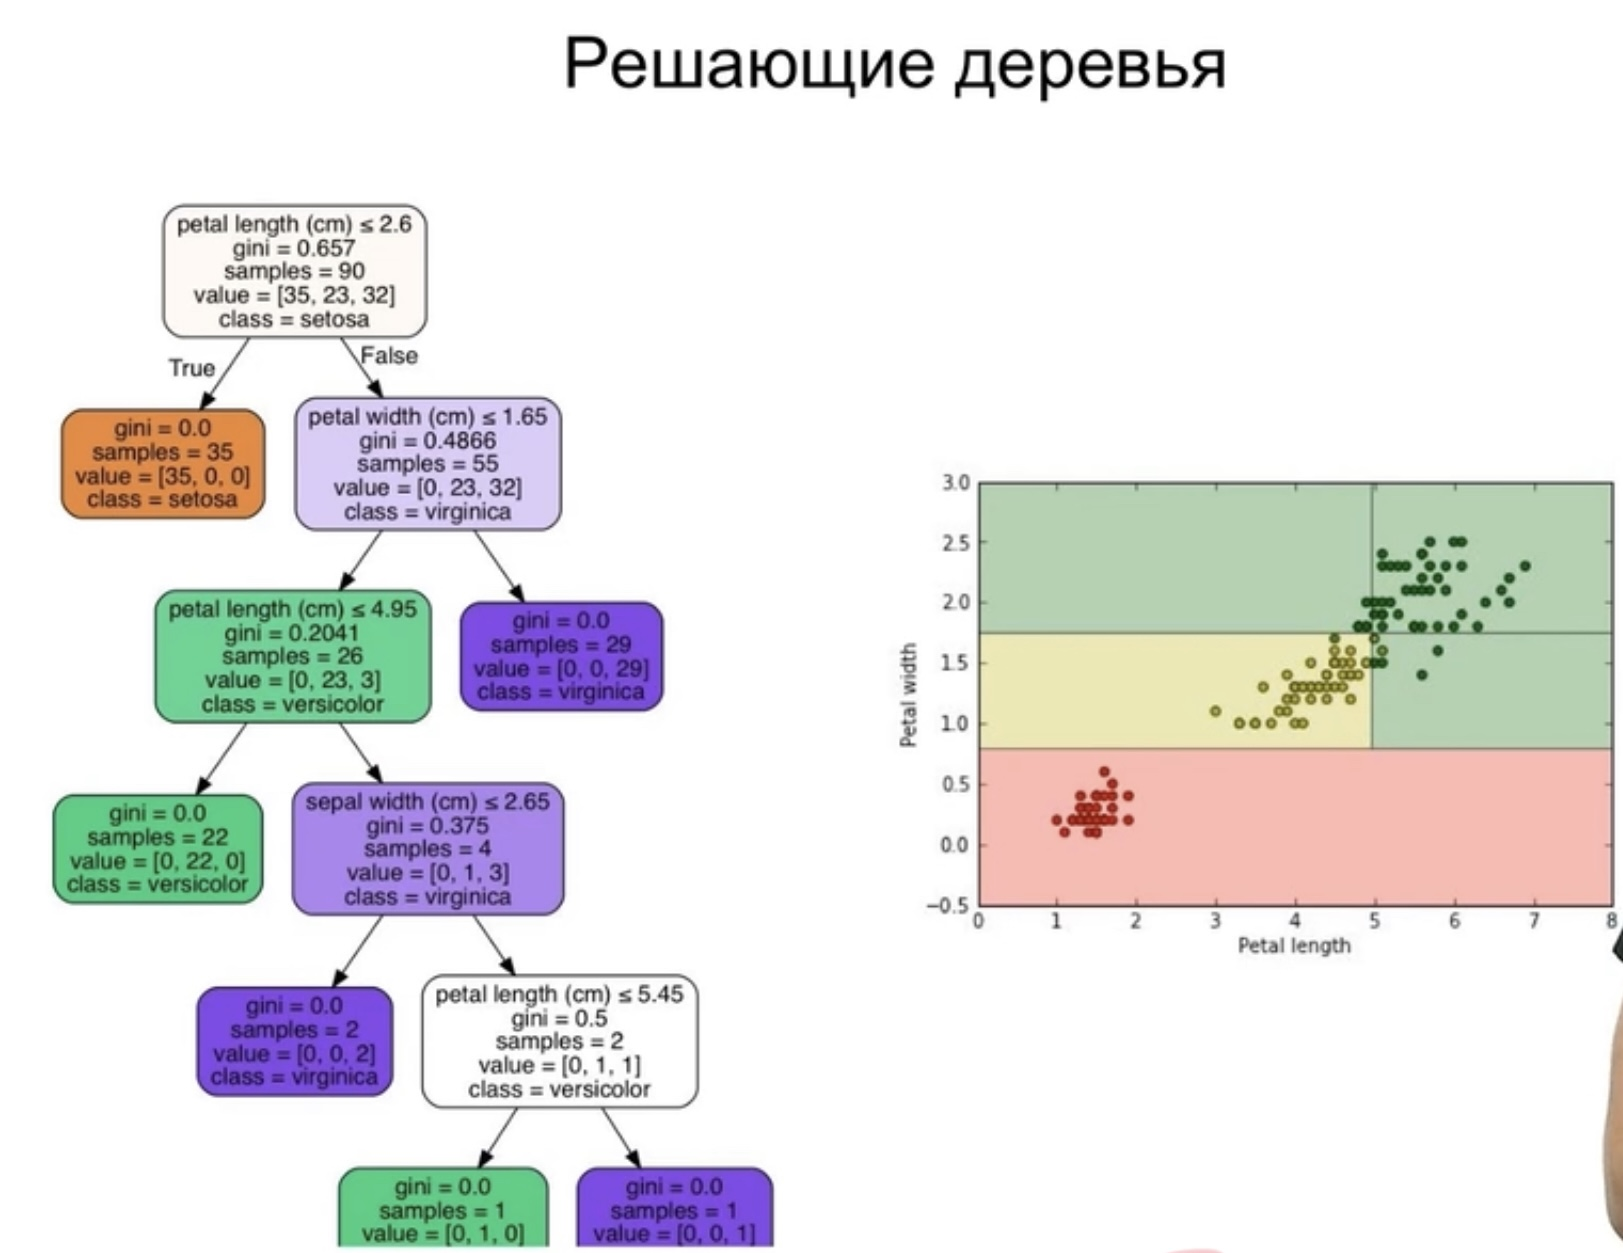

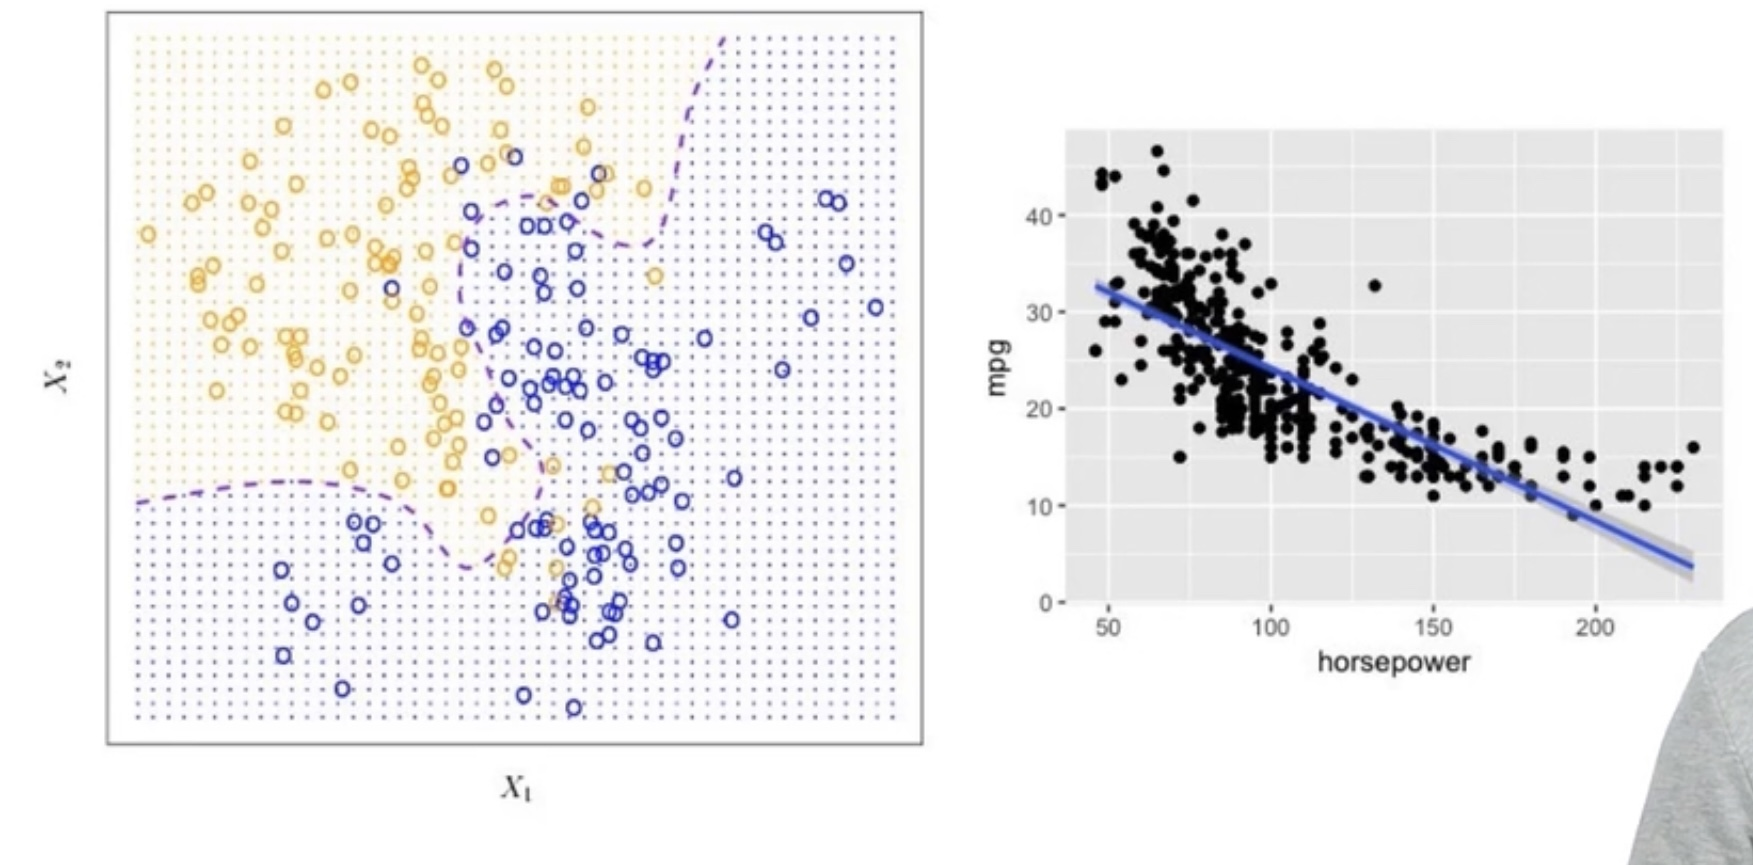

__Линейная регрессия__:

Преимущества:
* Легко обучить (подбор $\theta$ коэффициентов прост);
* Легко интерпритировать;

Недостатки:
* только для линейной зависимости;
* накладываем на данные много ограничений/ожиданий, которые должны выполняться: нормальное распределение остатков, гомоскедастичность, линейная зависимсоть переменных).

__Дерево принятия решений__

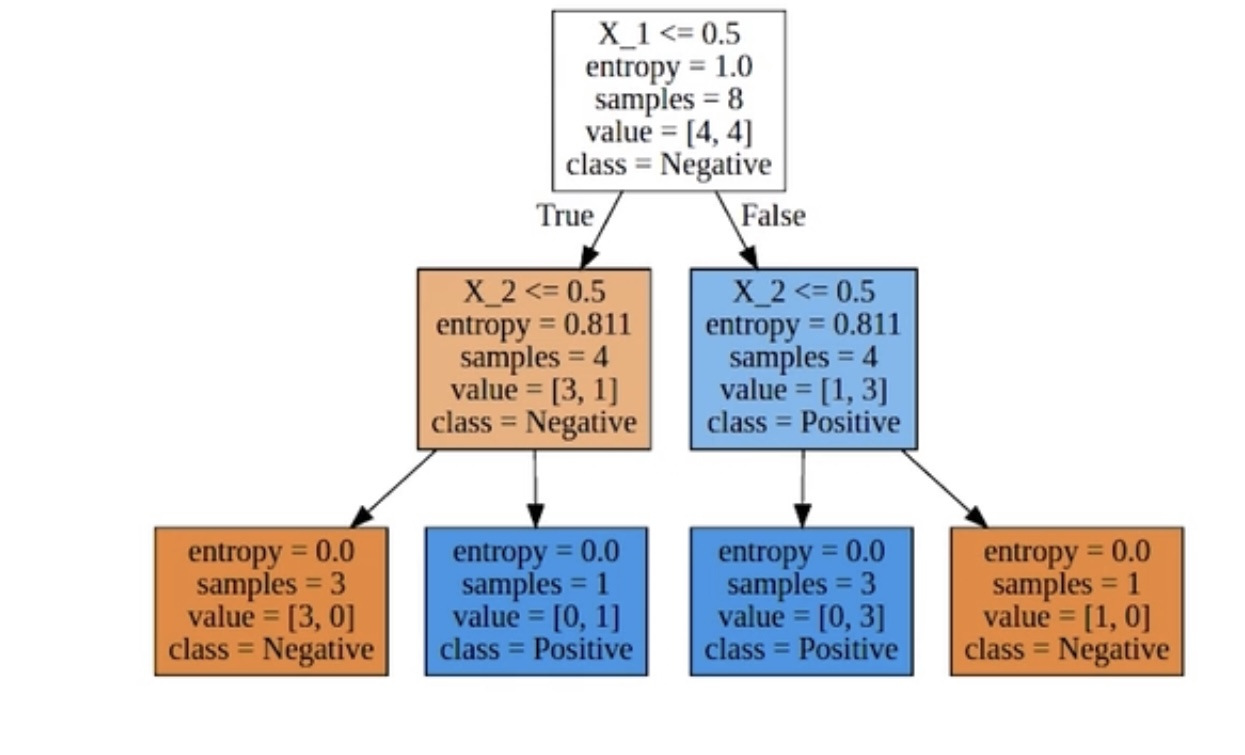

__Математическое основание дерева__

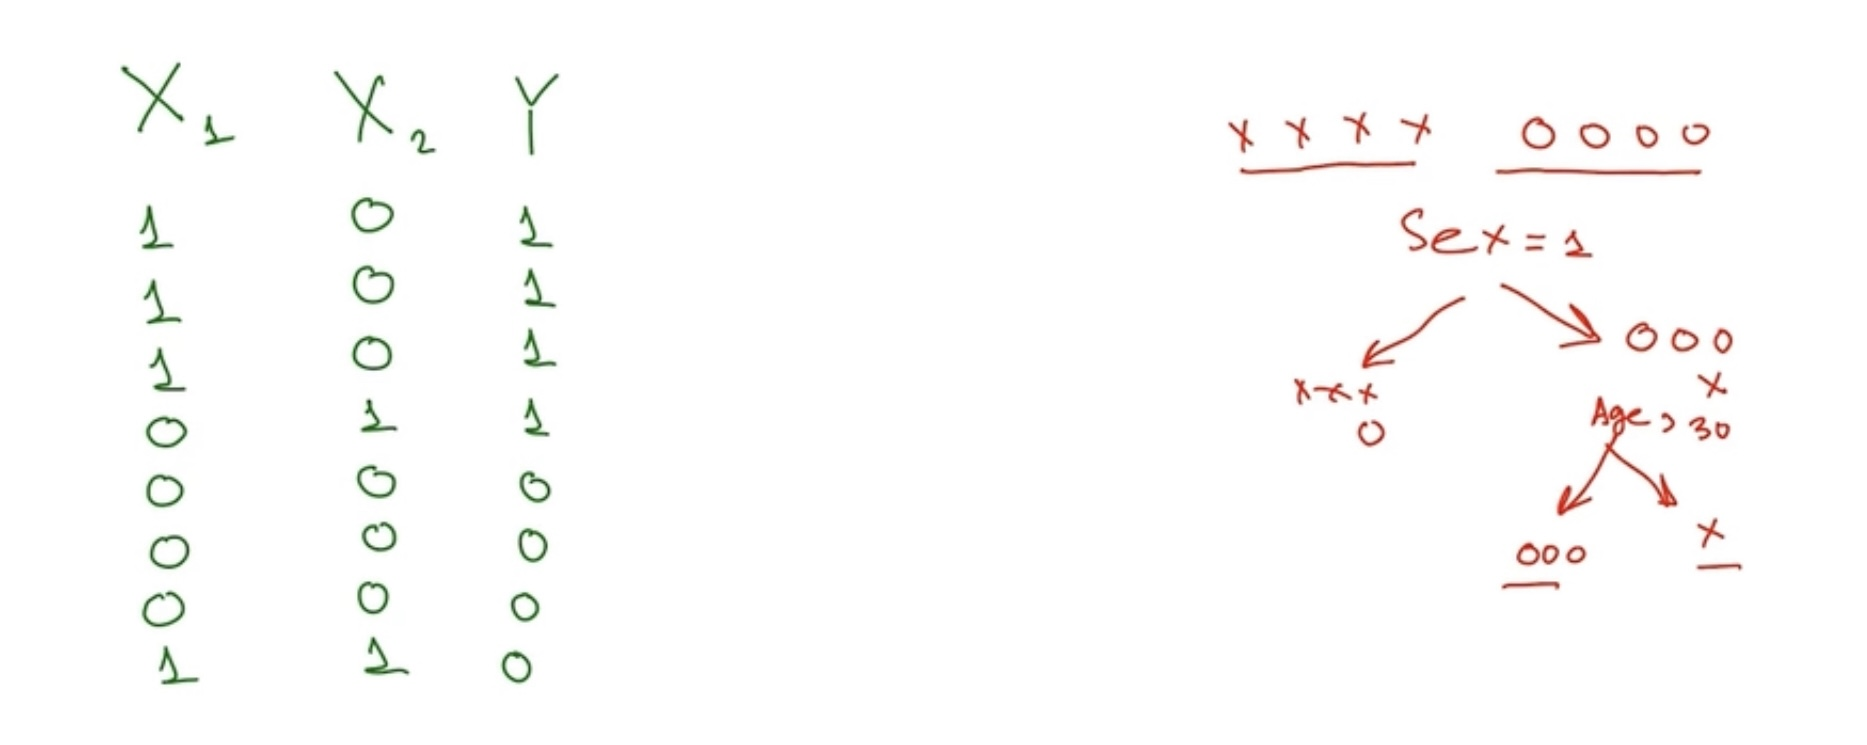

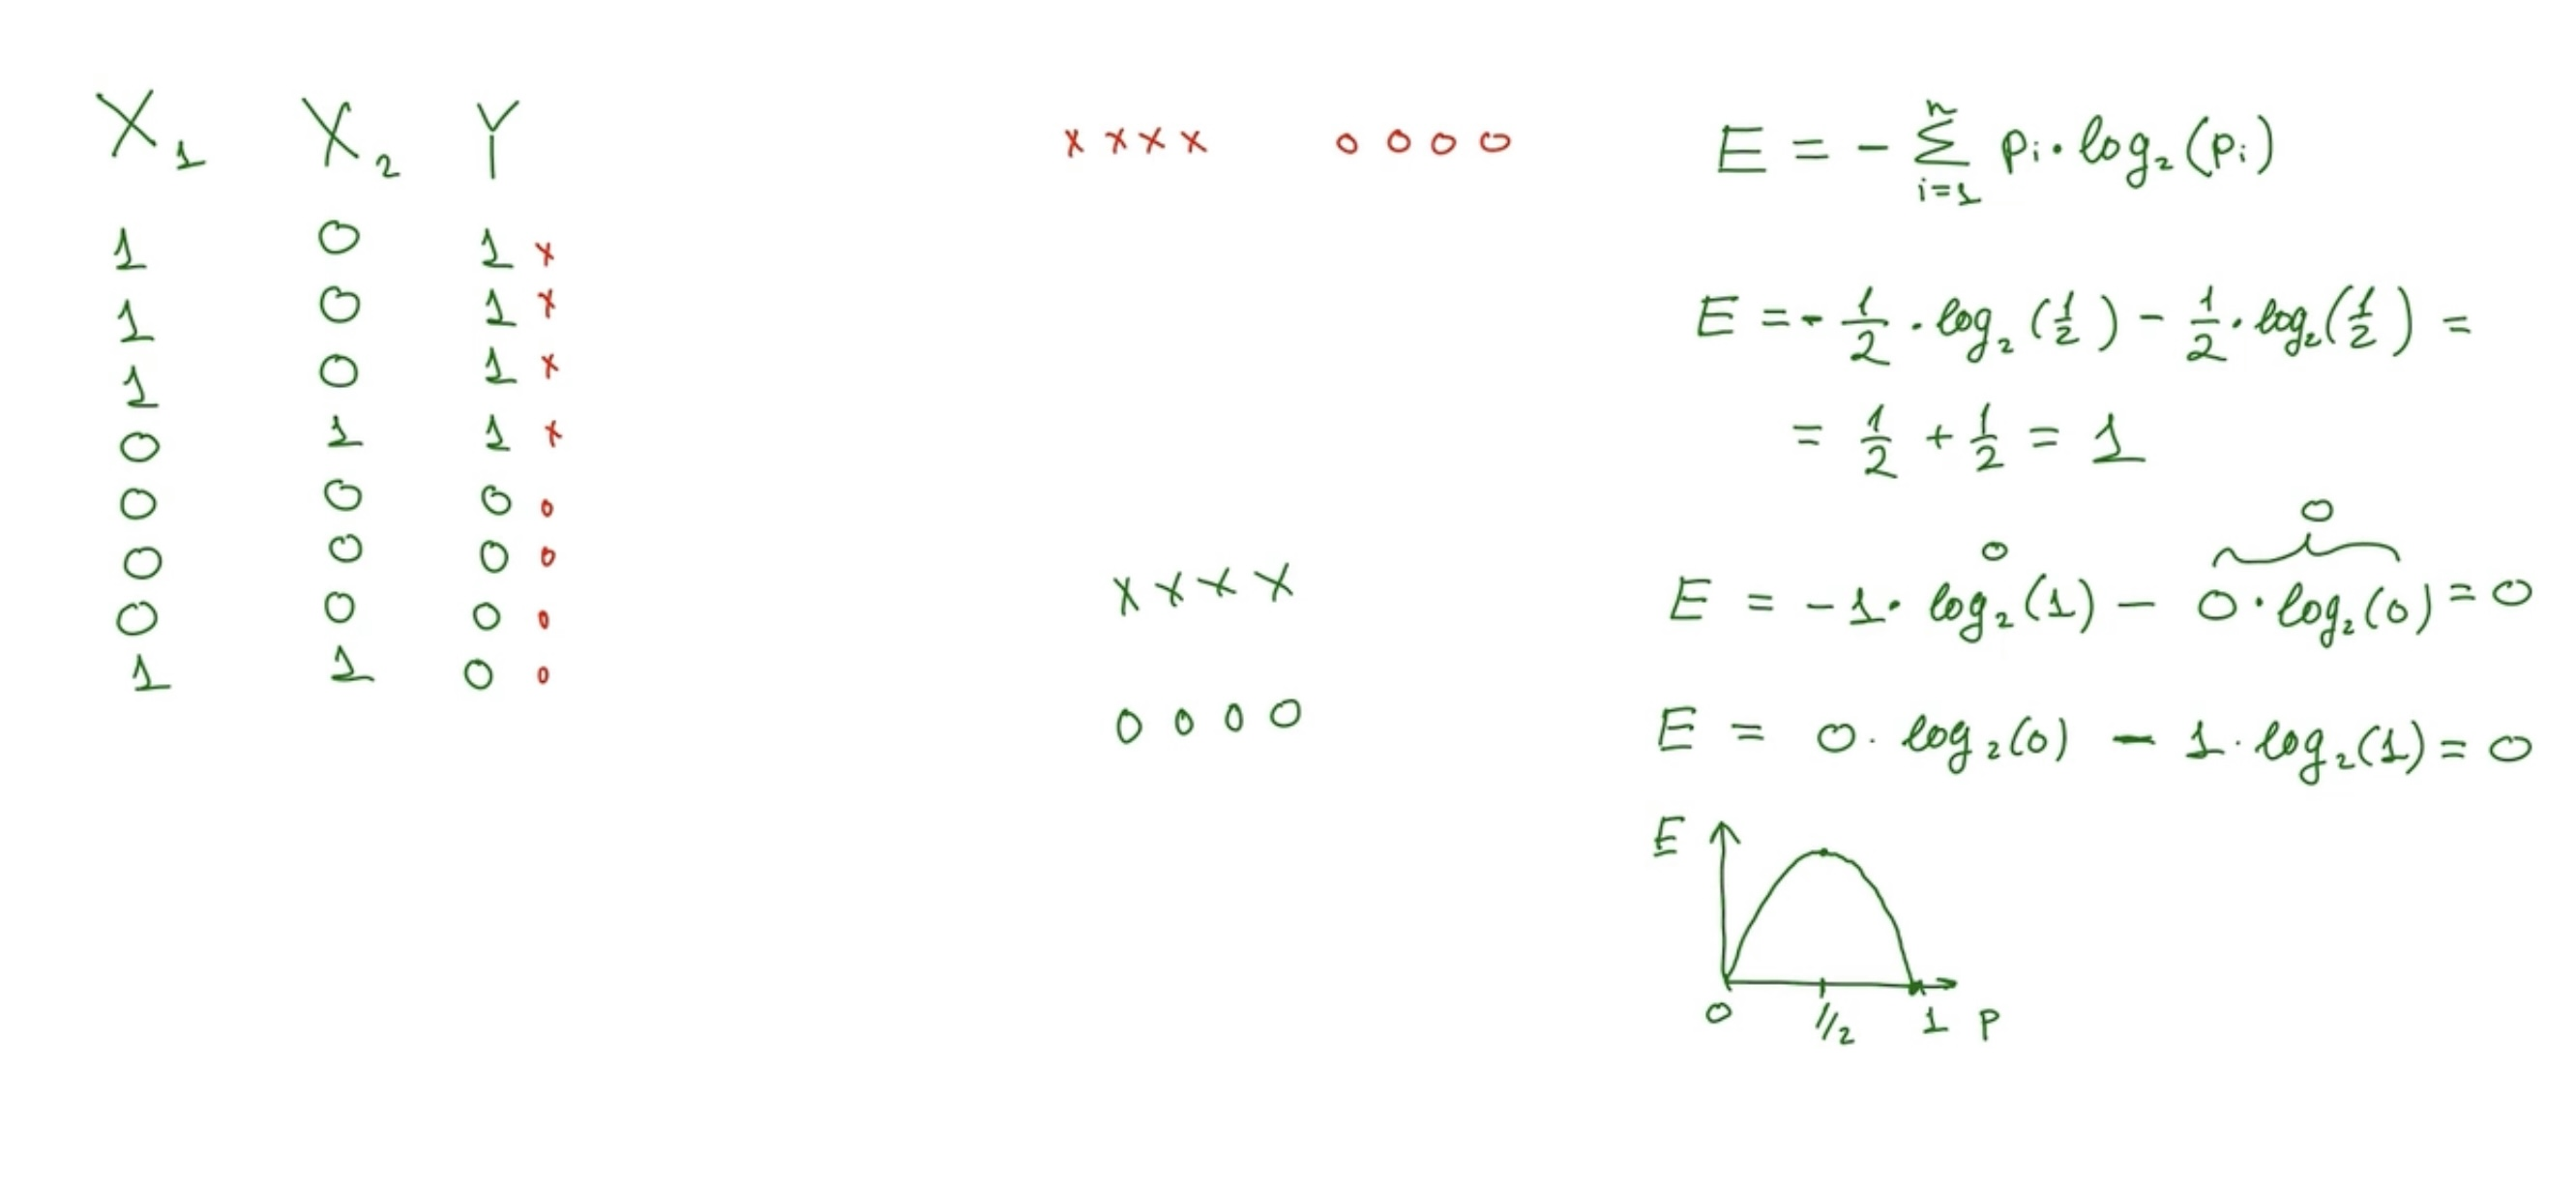

Энтропия - $E = -\sum_{i=1}^{n}{p_i*log_2(p_i)}$

Information gain - $IG = E(Y) - E(Y|X)$, где $E(Y|X) = \frac{n_1}{N}*E_1 + \frac{n_2}{N}*E_2$

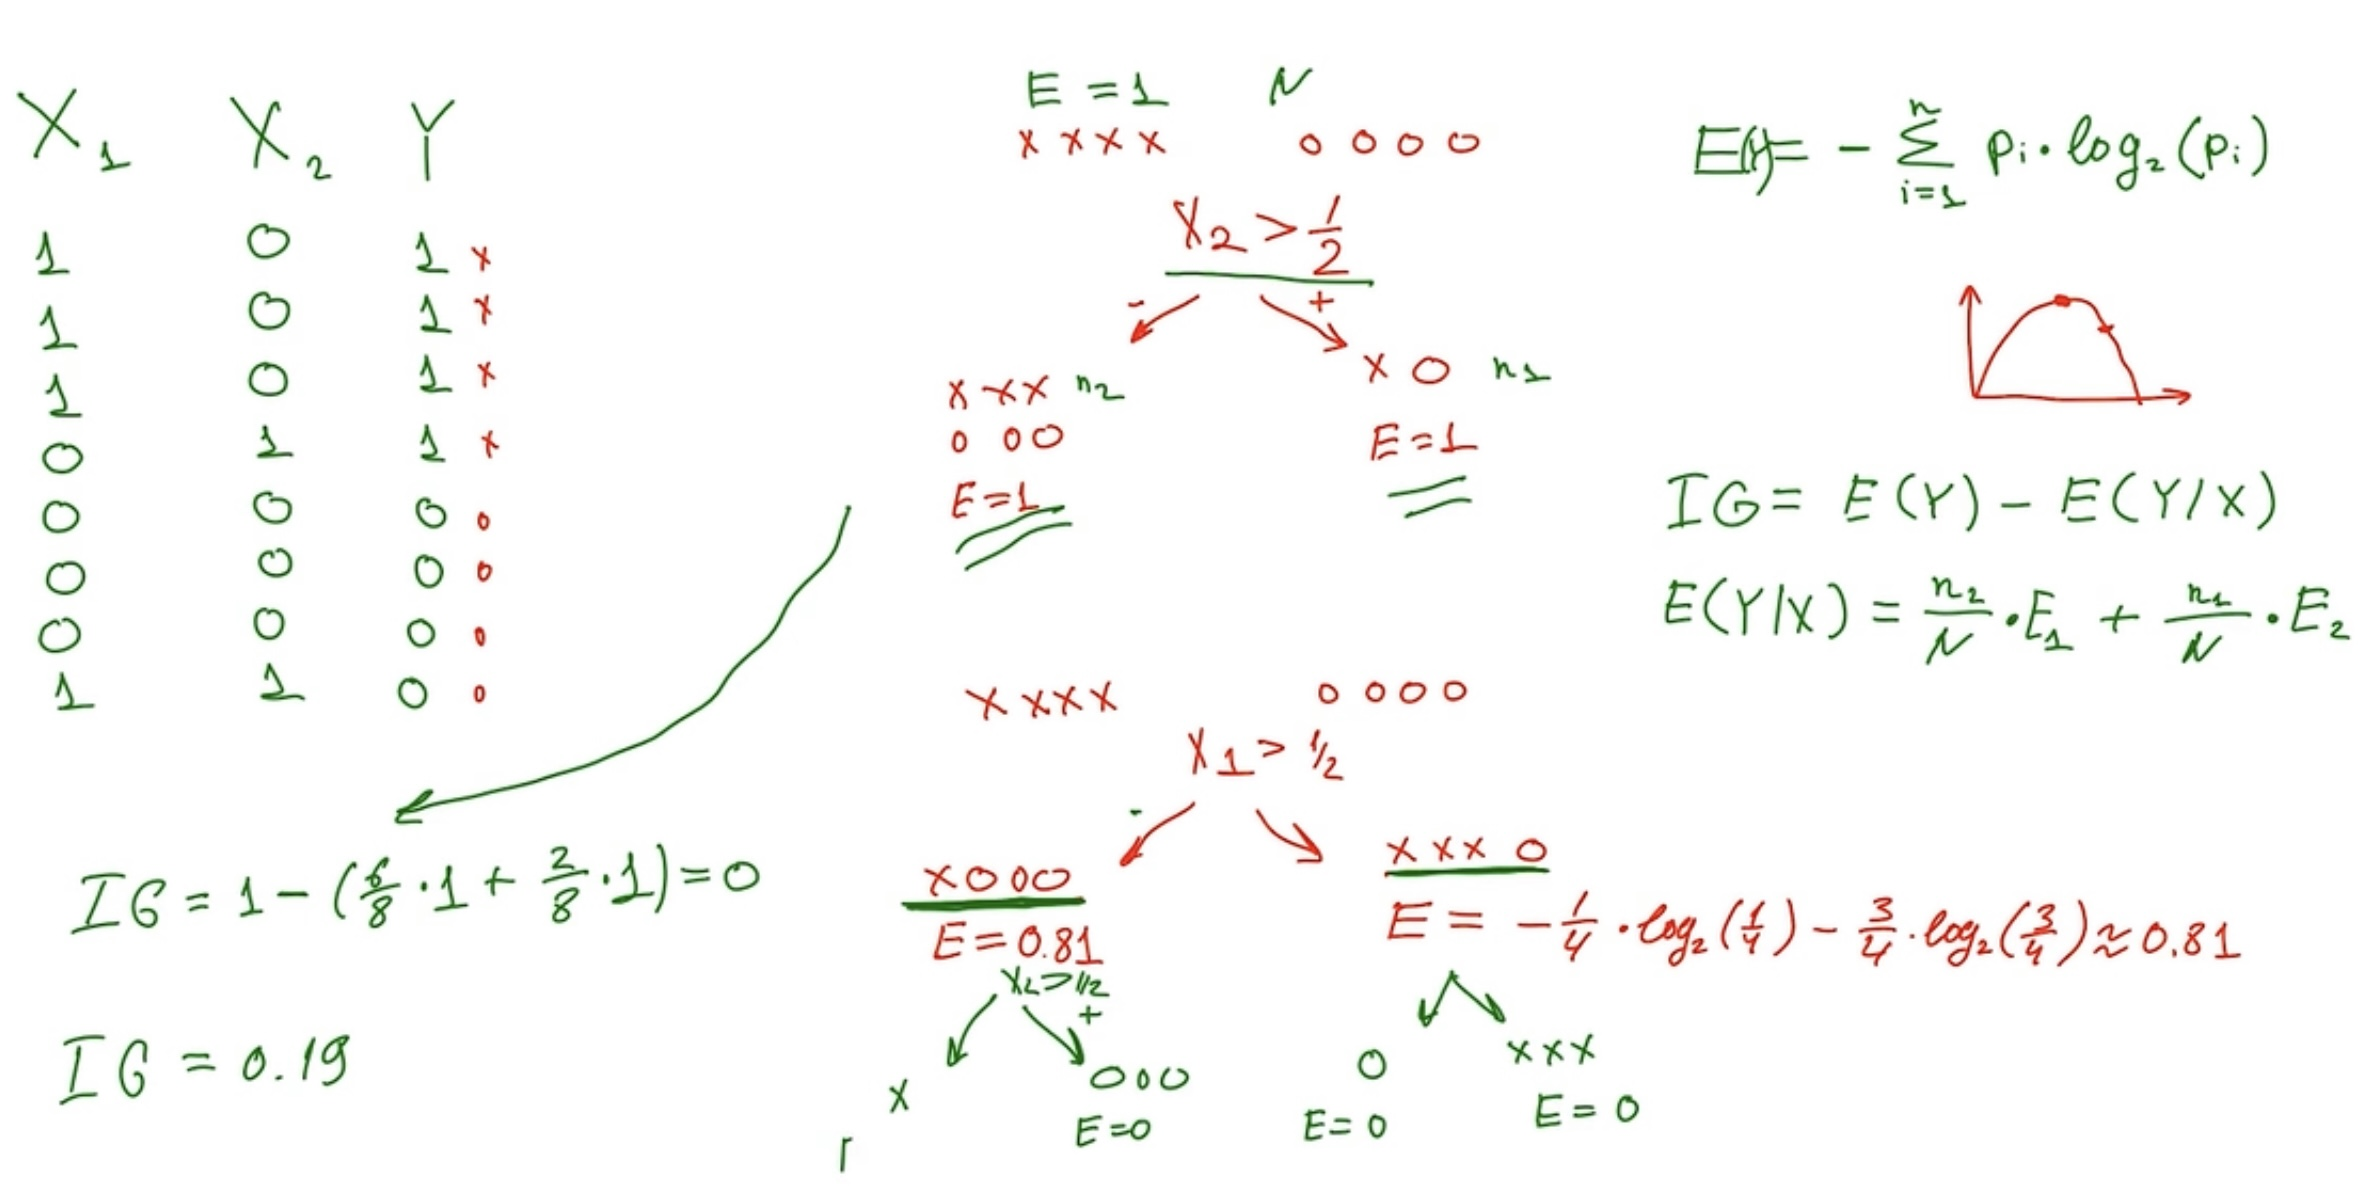

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
                     'Y' : [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

X_1  X_2  Y
0    1    0  1
1    1    0  1
2    1    0  1
3    0    1  1
4    0    0  0
5    0    0  0
6    0    0  0
7    1    1  0

In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feauter_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True
                                    ))
display(SVG(graph.pipe(format='svg')))

In [9]:
# решение задания 
import math

def entropy(n1, n2):
    if (n1 == 0) or (n2 == 0):
        return 0
    else:
        return (-(n1/(n1+n2)) * math.log2((n1/(n1+n2)))) - ((n2/(n1+n2)) * math.log2((n2/(n1+n2))))

def information_gain(n1, n2, n3, n4):
    en1 = entropy(n1, n2)
    en2 = entropy(n3, n4)
    
    entropy_y = entropy(n1+n3, n2+n4)
    entropy_y_x = (((n1+n2) / (n1+n2+n3+n4)) * en1) + (((n3+n4) / (n1+n2+n3+n4)) * en2)
    
    return entropy_y - entropy_y_x

In [10]:
entropy(4, 6)

0.9709505944546686

In [11]:
information_gain(0,6,4,0)

0.9709505944546686

## Titanic

In [12]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
titanic = pd.read_csv('titanic/train.csv')

In [14]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic.shape

(891, 12)

In [17]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [18]:
X = pd.get_dummies(X)

In [19]:
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [20]:
X = X.fillna({'Age' : X.Age.median()})

In [21]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [22]:
y = titanic.Survived

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [25]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feauter_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

NameError: name 'Source' is not defined

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
clf.score(X, y)

0.9797979797979798

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
clf.score(X_train, y_train)

0.9798657718120806

In [30]:
clf.score(X_test, y_test)

0.7728813559322034

In [31]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
clf2.score(X_train, y_train)

0.8238255033557047

In [33]:
clf2.score(X_test, y_test)

0.8203389830508474

## Overfitting and Underfitting

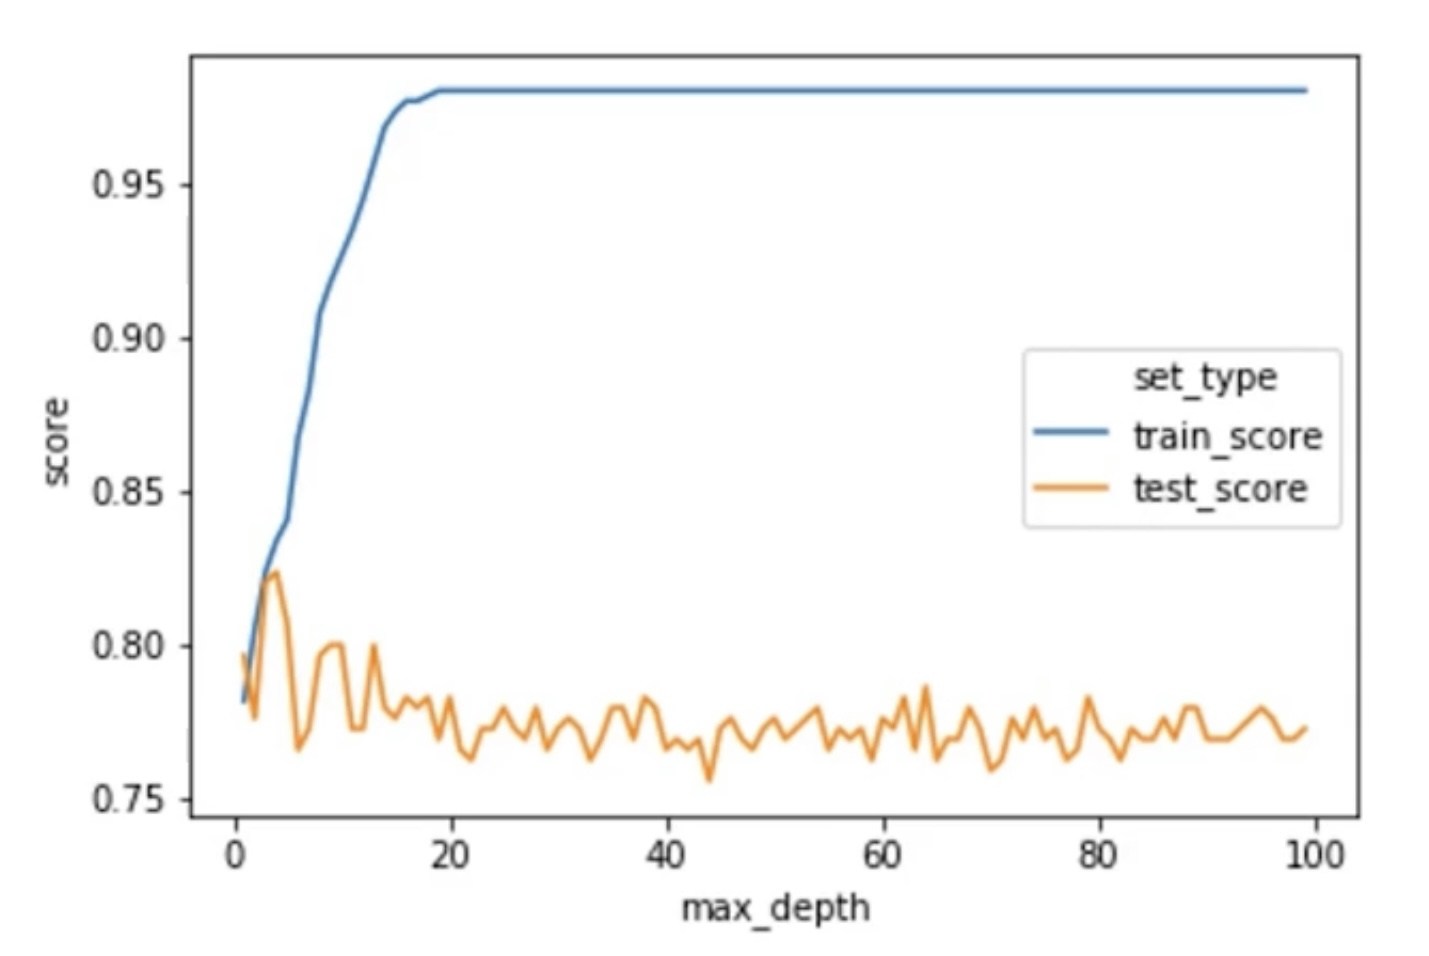

С увеличением глубины дерево, растет точность на обучающем наборе. Это переобучение. Для точной настройки дерева, нужно подбирать гиперпараметры, лучше всего это делать на кросс-валидации.

__Cross-Validation__

При маленькой выборке, используя Cross-validation, дерево может быть чувствительна к данным. При глубине от 1 до n может на шагах быть то лучше, то хуже.

In [34]:
max_depth_values = range(1, 100)

In [35]:
scores_data = pd.DataFrame()

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
for max_depth in max_depth_values:
    clf3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf3.fit(X_train, y_train)
    train_score = clf3.score(X_train, y_train)
    test_score = clf3.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf3, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [41]:
scores_data.head()

max_depth  train_score  test_score  cross_val_score
0          1     0.781879    0.796610         0.781961
0          2     0.805369    0.776271         0.770196
0          3     0.823826    0.820339         0.790322
0          4     0.833893    0.823729         0.788627
0          5     0.840604    0.810169         0.800392

In [42]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], 
                                    value_vars=['train_score', 'test_score', 'cross_val_score'], 
                                   var_name='set_type', value_name='score')

In [43]:
scores_data_long.head()

max_depth     set_type     score
0          1  train_score  0.781879
1          2  train_score  0.805369
2          3  train_score  0.823826
3          4  train_score  0.833893
4          5  train_score  0.840604

<AxesSubplot:xlabel='max_depth', ylabel='score'>

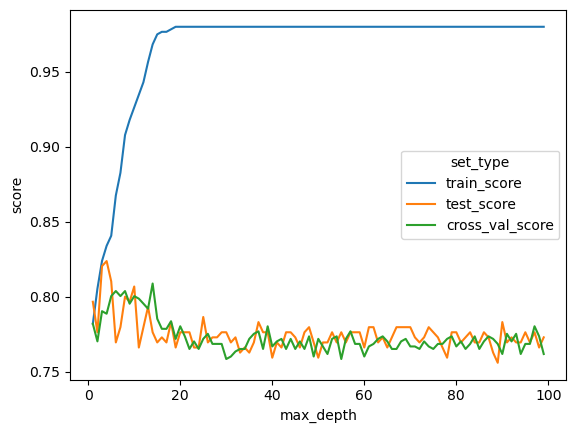

In [44]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [45]:
clf4 = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')

In [46]:
cross_val_score(clf4, X_train, y_train, cv=5).mean()

0.7886274509803922

In [47]:
best_clf = tree.DecisionTreeClassifier(max_depth=10, criterion='entropy')

In [48]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7830508474576272

#### Метрики качества Precision/Recall

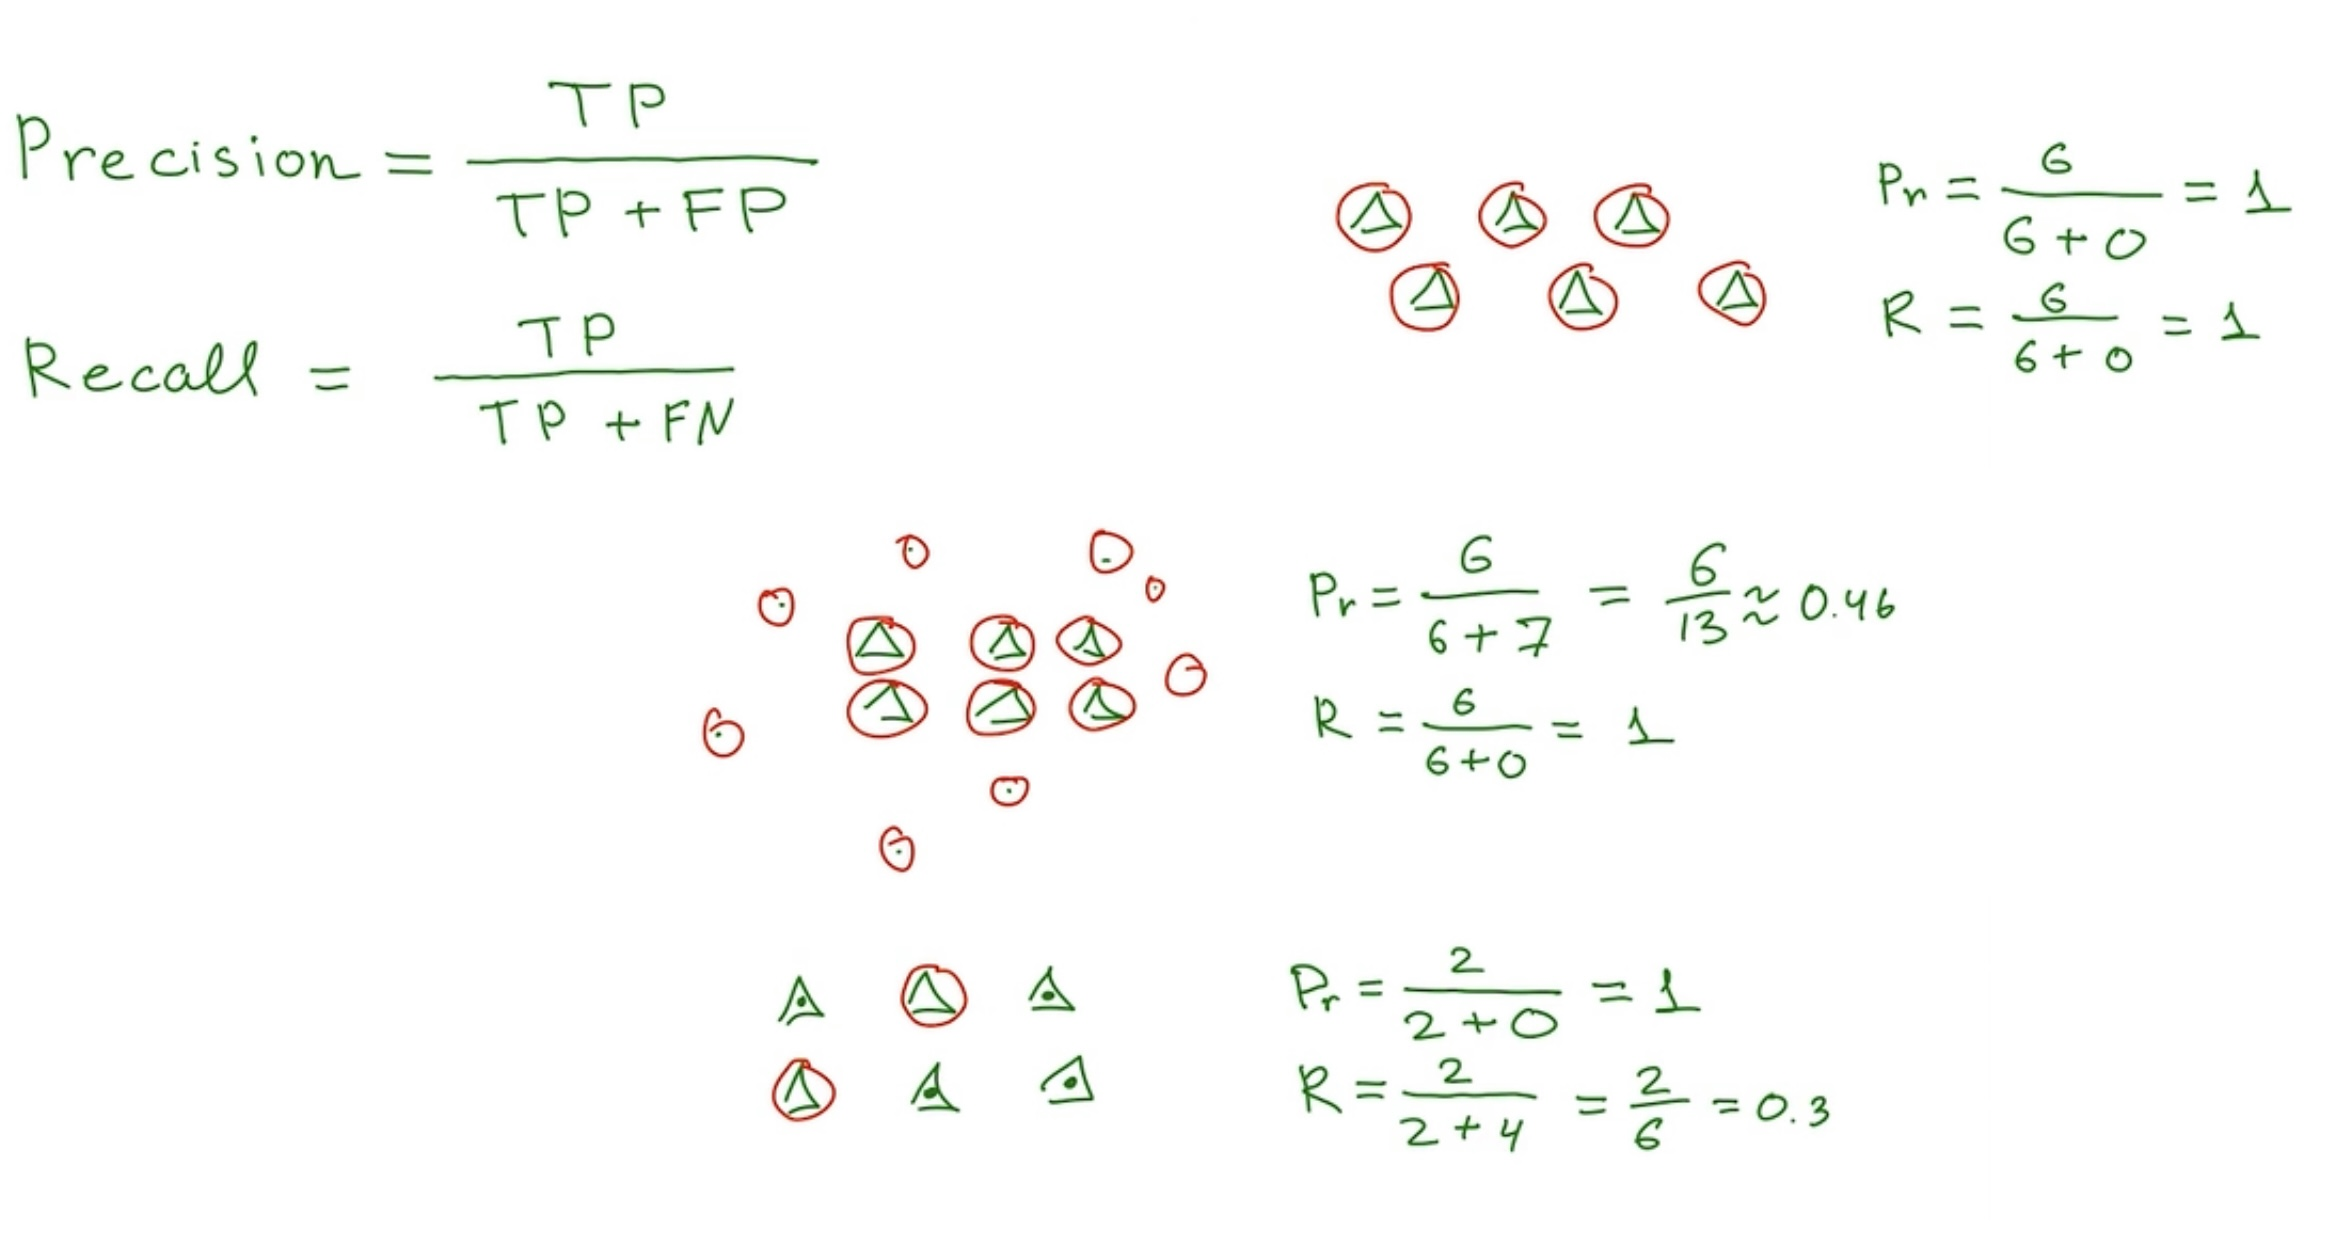

Precision = $\frac{TP}{TP+FP}$

Recall = $\frac{TP}{TP+FN}$

Precision(точность) и recall(полнота) строятся на метрице ошибок (confusion matrix)

## Подбор параметров ROC 

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf = tree.DecisionTreeClassifier()

parameters ={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [51]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [52]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [53]:
best_clf = grid_search_cv_clf.best_estimator_

In [54]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [66]:
from sklearn.metrics import precision_score, recall_score

In [56]:
y_pred = best_clf.predict(X_test)

In [67]:
precision_score(y_test, y_pred)

0.8023255813953488

In [68]:
recall_score(y_test, y_pred)

0.575

In [69]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [70]:
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

In [71]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

<AxesSubplot:>

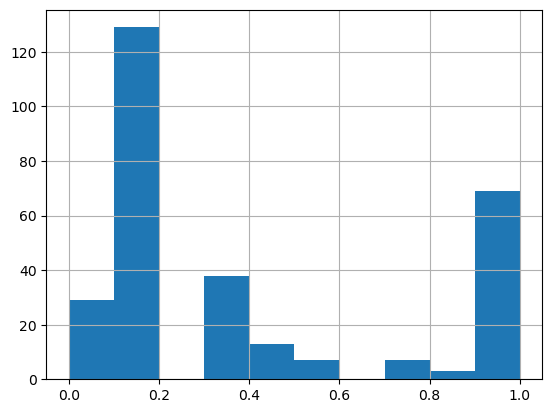

In [73]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [75]:
import numpy as np

new_y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [76]:
new_y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

In [77]:
precision_score(y_test, new_y_pred)

0.8611111111111112

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from sklearn.datasets import make_classification

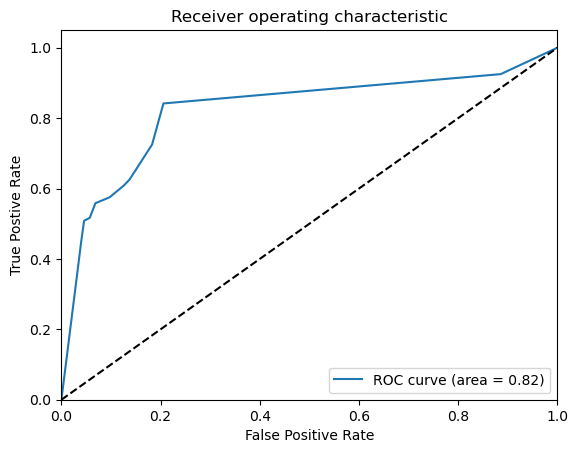

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) # compute area under the curve

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')